In [26]:
import csv
import numpy as np
import matplotlib.pyplot as plt

# abre el archivo CSV en modo lectura y crea un objeto de archivo CSV
with open('kc_house_data.csv', 'r') as file:
    csv_reader = csv.reader(file)

    # lee las filas del archivo CSV en una lista
    rows = []
    for row in csv_reader:
        rows.append(row)
        
data = np.genfromtxt('kc_house_data.csv', delimiter=',', skip_header=1)

dataSize = data.shape[0]  # numero de filas

# convierte la lista de filas en un array de NumPy
array = np.array(rows)

# imprime el array
#print(array)

# Convierte las columnas de texto a valores numéricos
X = array[1:, 5].astype(float).reshape(-1, 1)  # Pies cuadrados del espacio habitable interior
y = array[1:, 2].astype(float).reshape(-1, 1)  # Precio

# x va a ser la variable de pies cuadrados del espacio habitable interior
# Y va a ser la variable de precio

# agrega una columna de 1s a la matriz de características

Xr = np.hstack((np.ones_like(X), X))

print(Xr)
print(X.shape)
print(y.shape)

# JUSTAR EL POLINOMIO UTILIZANDO LA FUNCIÓN POLYFIT, LUEGO USAR LA FUNCIÓN POLY1D PARA MOSTRAR LAS FUNCIONES POLINOMALES

#f = np.polyfit(X[:,0], y[:,0], 2)
#p = np.poly1d(f)

# Imprime la función polinomial
# Esto significa que la línea de mejor ajuste proporcionada automáticamente por la función Polyfit

#print(p)




[[1.00e+00 1.18e+03]
 [1.00e+00 2.57e+03]
 [1.00e+00 7.70e+02]
 ...
 [1.00e+00 1.02e+03]
 [1.00e+00 1.60e+03]
 [1.00e+00 1.02e+03]]
(21613, 1)
(21613, 1)


In [27]:
#funcion de regresion lineal
# retorna el costo de la regresión lineal y el gradiente
def linreg(X, y, t, cost, grad, a=0.1, n=100, onStep=None):
    costs = []
    for i in range(n):
        t -= a * grad(X, y, t)
        costs.append(cost(X, y, t))

        if onStep:
            onStep(t)

    return t, costs

In [28]:
# función de costo y gradiente para regresión lineal
# X = matriz de características
# y = vector de valores objetivo

cost = lambda X,y,t: ((X @ t - y) ** 2).sum() / len(y)
grad = lambda X,y,t : 2 * X.T @ (X @ t - y) / len(y)

In [29]:


# Definimos el t inicial como un valor random
to = np.random.rand(Xr.shape[1], 1)

tf, costs = linreg(Xr,
                   y,
                   to,
                   cost,
                   grad,
                   a=0.0000000025,
                   n=100)

# Definimos el valor de xm  
xm = np.array([[0], [dataSize]])
xmr = np.hstack((
    np.ones((2, 1)),
    xm
))

# Definimos ym que es el valor de la funcion de regresion lineal
ym = xmr @ tf


to = np.random.rand(Xr.shape[1], 1) # Definimos el t inicial como un valor random.

to = to[~np.isnan(to)] # Elimina los valores NaN.
to = to.reshape((len(to), 1))

print(xm.shape, ym.shape)
print(xm)
print(tf)
print(ym)
print(xmr)




(2, 1) (2, 1)
[[    0]
 [21613]]
[[  0.300059  ]
 [243.95834898]]
[[3.00058996e-01]
 [5.27267210e+06]]
[[1.0000e+00 0.0000e+00]
 [1.0000e+00 2.1613e+04]]


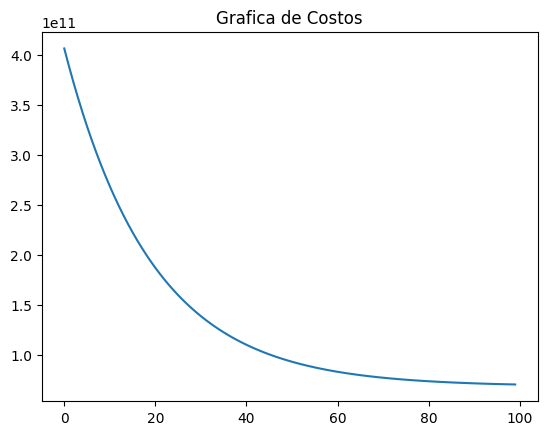

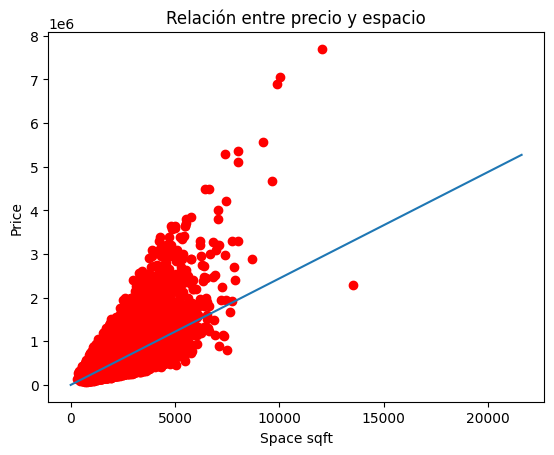

In [30]:
#grafica de los datos


plt.plot(costs)
plt.title("Grafica de Costos")
plt.show()

plt.plot(X, y, 'ro')
plt.plot(xm, ym)
plt.title("Relación entre precio y espacio")
plt.xlabel('Space sqft')
plt.ylabel('Price')
plt.show()



           8             7             6             5             4
3.935e-24 x - 1.853e-19 x + 3.397e-15 x - 3.091e-11 x + 1.479e-07 x
              3          2
 - 0.0003646 x + 0.4652 x - 136.8 x + 2.36e+05


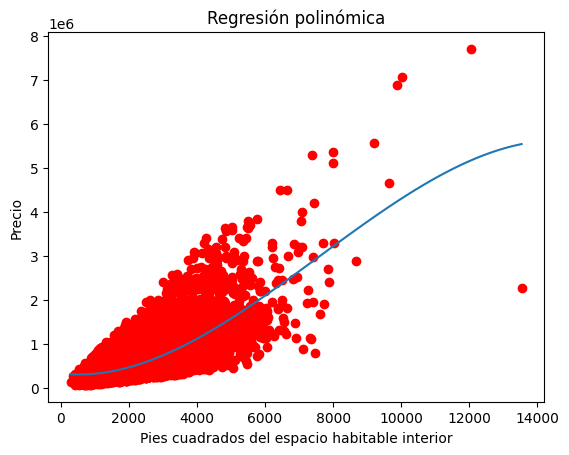

In [31]:
# Dividir los datos en conjuntos de entrenamiento y prueba
train_size = int(0.8 * dataSize)
X_train, X_test = np.split(Xr, [train_size])
y_train, y_test = np.split(y, [train_size])

# Iterar sobre diferentes grados de polinomios
degrees = range(1, 11)
mse_test = np.zeros(len(degrees))
for i, degree in enumerate(degrees):
    # Calcular la función polinomial en el conjunto de entrenamiento
    p = np.polyfit(X_train[:, 1], y_train[:, 0], degree)
    # Calcular el error cuadrático medio en el conjunto de prueba
    y_pred = np.polyval(p, X_test[:, 1])
    mse_test[i] = np.mean((y_test[:, 0] - y_pred) ** 2)

# Seleccionar el grado de polinomio que minimice el error cuadrático medio en el conjunto de prueba
best_degree = degrees[np.argmin(mse_test)]

# Calcular la función polinomial con el grado seleccionado en todo el conjunto de datos
p = np.polyfit(Xr[:, 1], y[:, 0], best_degree)
poly = np.poly1d(p)

# Imprimir la función polinomial
print(poly)

# Ajustar un polinomio de grado 3 a los datos
p = np.polyfit(X[:,0], y[:,0], 3)

# Crear una función polinómica a partir de los coeficientes ajustados
f = np.poly1d(p)

# Generar valores de predicción para una serie de valores de entrada
x_pred = np.linspace(X.min(), X.max(), 100)
y_pred = f(x_pred)

# Graficar los datos y la curva polinómica
plt.plot(X[:,0], y[:,0], 'ro')
plt.plot(x_pred, y_pred)
plt.title("Regresión polinómica")
plt.xlabel('Pies cuadrados del espacio habitable interior')
plt.ylabel('Precio')
plt.show()

En la función polinomial dada, el término de mayor grado (x^8) tiene un coeficiente muy pequeño (3.935e-24), lo que significa que su contribución a la predicción del valor objetivo es insignificante. Por otro lado, el término de grado 1 (x) tiene un coeficiente bastante grande (465.2), lo que sugiere que esta variable tiene una fuerte influencia en la predicción del valor objetivo. Por lo tanto, el valor que contribuye más a la predicción del valor objetivo en esta función polinomial es el valor de pies cuadrados del espacio habitable interior (variable x).

En general, esta función polinomial es una aproximación del patrón subyacente en los datos y se puede utilizar para hacer predicciones sobre nuevos datos que no se usaron para crear la función polinomial. Sin embargo, es importante recordar que la función polinomial puede no ser precisa en todas las situaciones y que la precisión de las predicciones puede depender de muchos factores, como la calidad de los datos y la complejidad del modelo utilizado.